In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('pmsm_temperature_data.csv')

In [43]:
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [5]:
df.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

In [6]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'pm', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

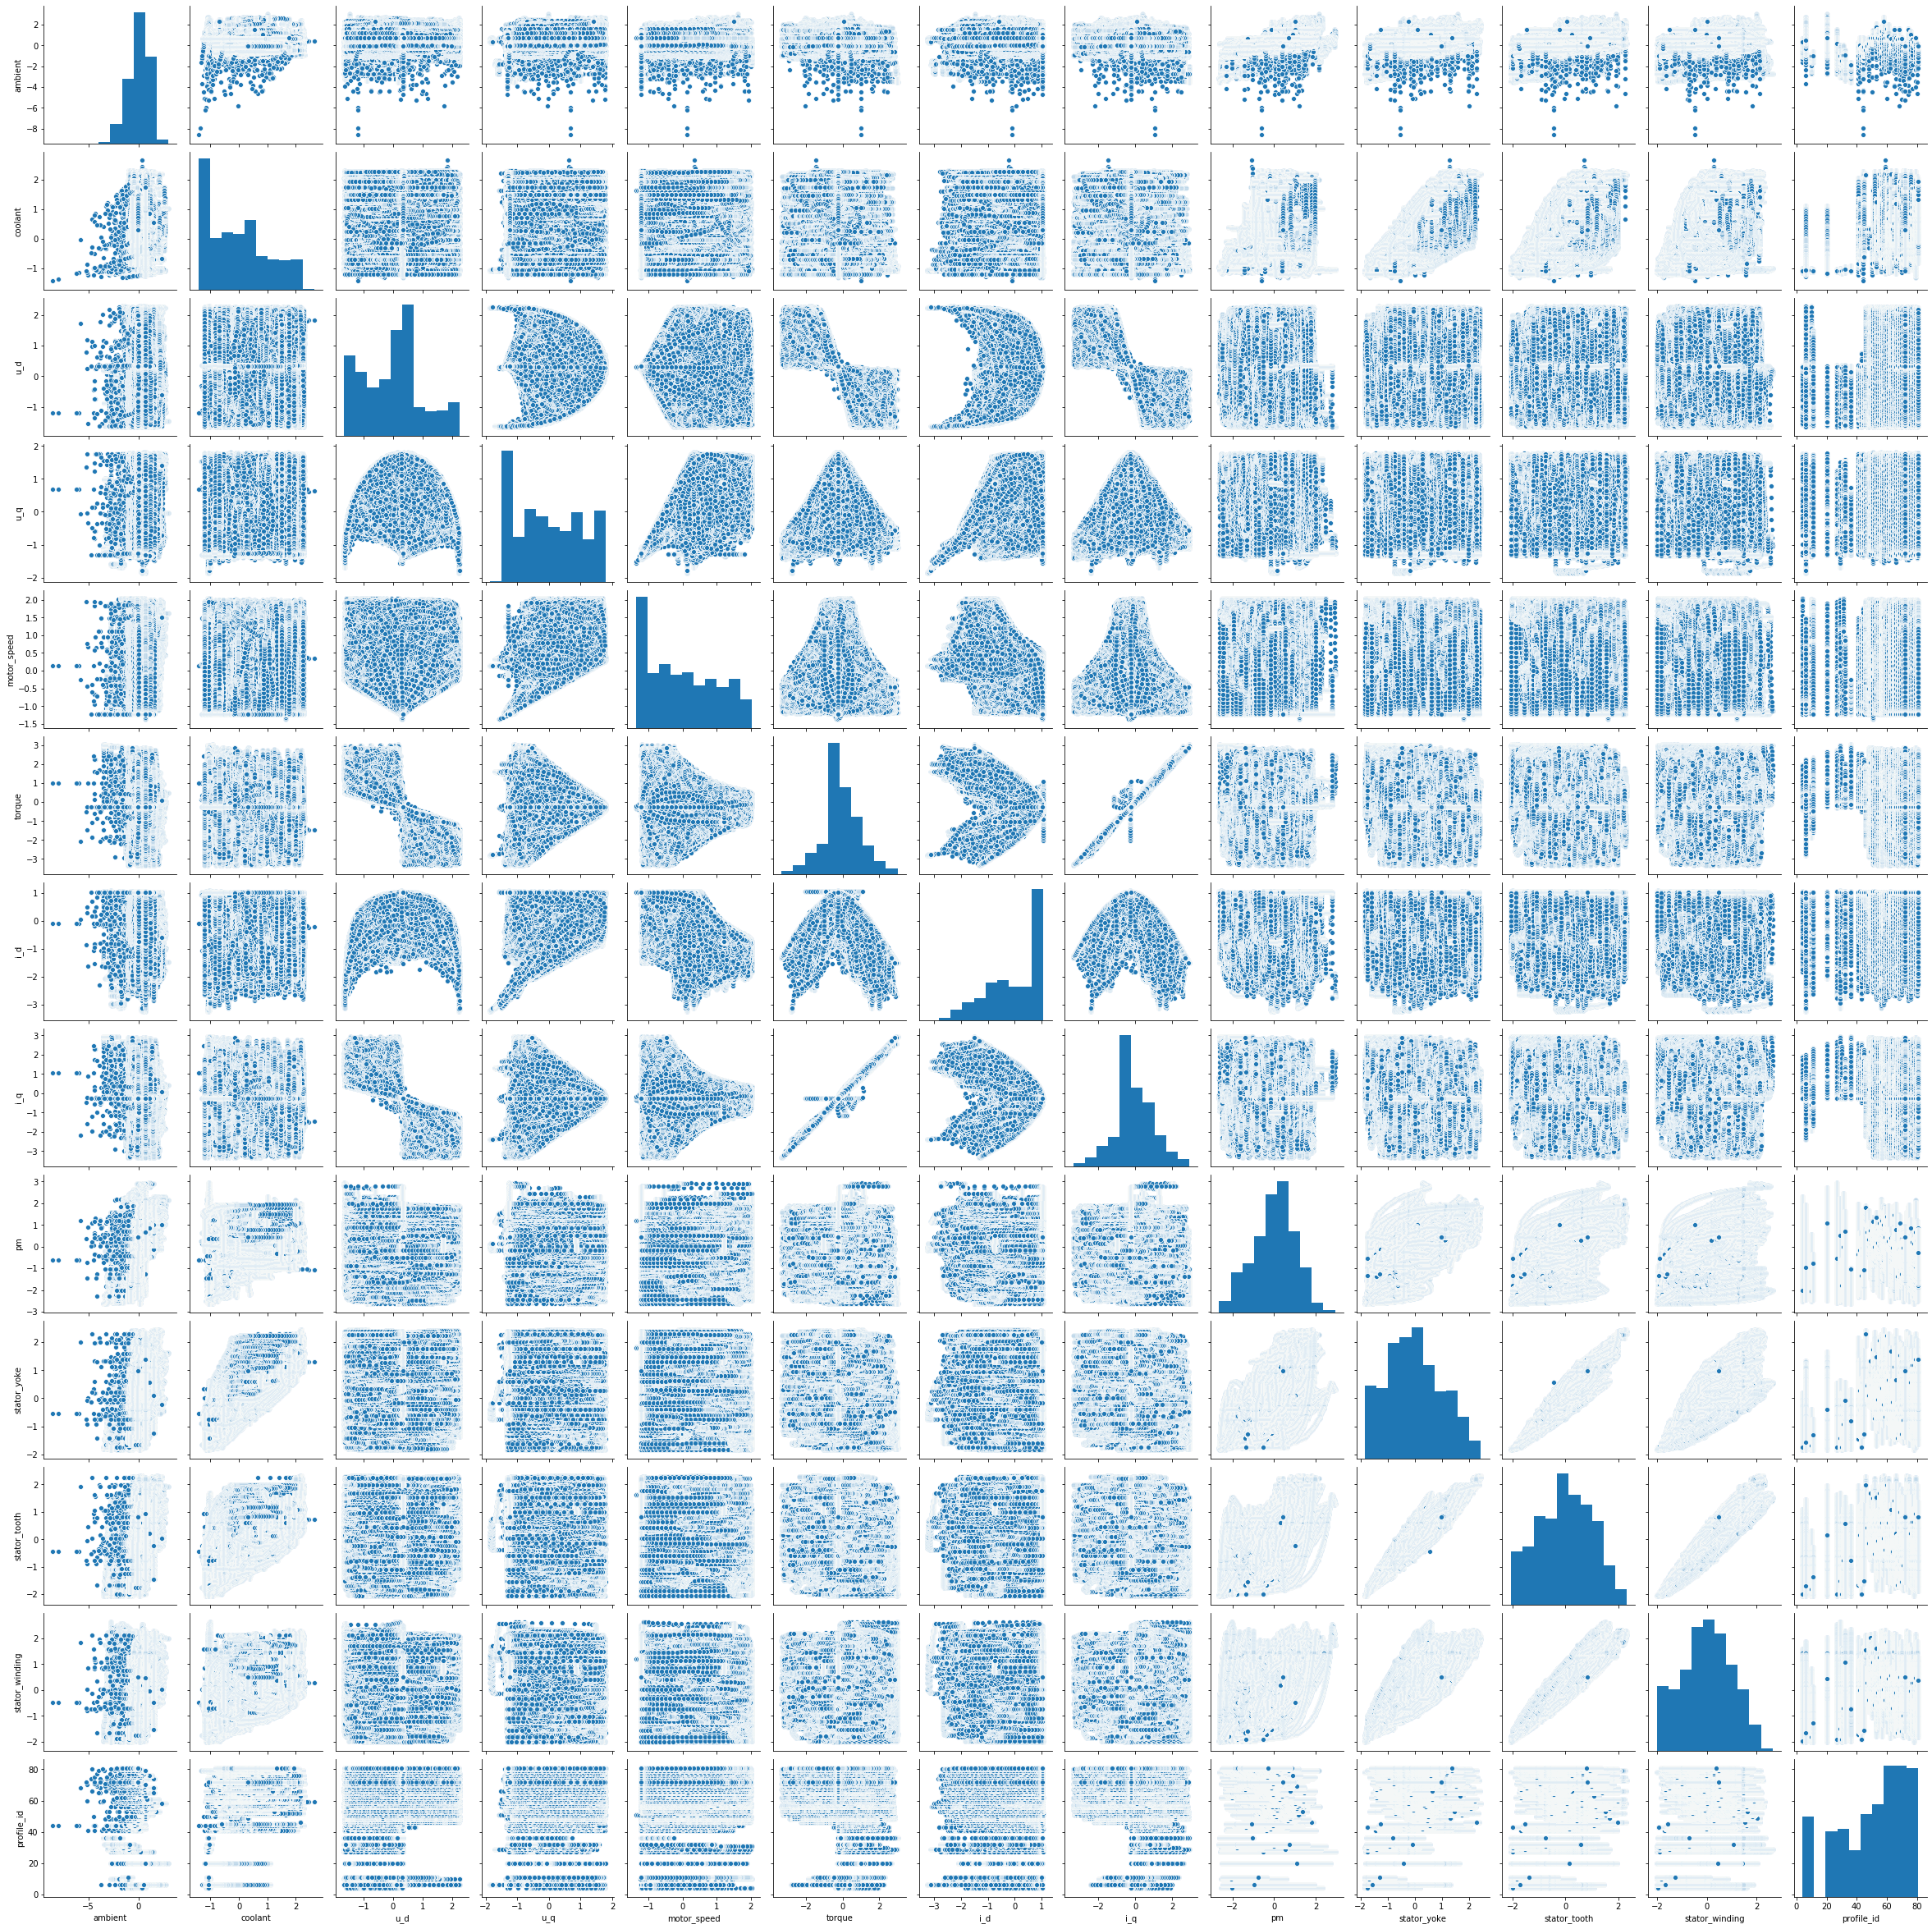

In [7]:
sns.pairplot(df)

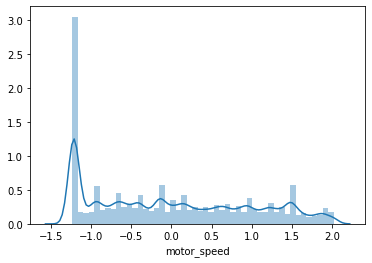

In [9]:
sns.distplot(df['motor_speed'])

# Scaling the Values

In [38]:
#df_new = df.drop('profile_id', axis = 1, inplace=True)

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data

array([[-0.75341625, -1.12045388,  0.32384208, ..., -2.06476719,
        -2.01744231, -2.11714577],
       [-0.77266885, -1.11903183,  0.32557536, ..., -2.06348257,
        -2.01704034, -2.11714577],
       [-0.78437773, -1.11869335,  0.32868866, ..., -2.06269656,
        -2.01675207, -2.11714577],
       ...,
       [-0.03871069,  0.30196085,  0.32685895, ...,  0.83648055,
         0.49742538,  0.96352508],
       [-0.03577363,  0.29664037,  0.32690032, ...,  0.83304777,
         0.49533692,  0.96352508],
       [-0.04017317,  0.30719908,  0.32674256, ...,  0.83058818,
         0.49413635,  0.96352508]])

# Principal Component Analysis for Dimension Reduction

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
x_pca = pca.transform(scaled_data)
x_pca #data reduced to 2 dimensional data

array([[ 4.93855655, -0.9471021 ],
       [ 4.9423402 , -0.94434573],
       [ 4.94500091, -0.94451544],
       ...,
       [-0.96793562, -1.32376146],
       [-0.96265713, -1.32425116],
       [-0.95848856, -1.32488931]])

In [54]:
print(scaled_data.shape)
print(x_pca.shape)
#comparing the original shape with the new shape

(998070, 13)
(998070, 2)


Text(0, 0.5, 'Second Principal Component')

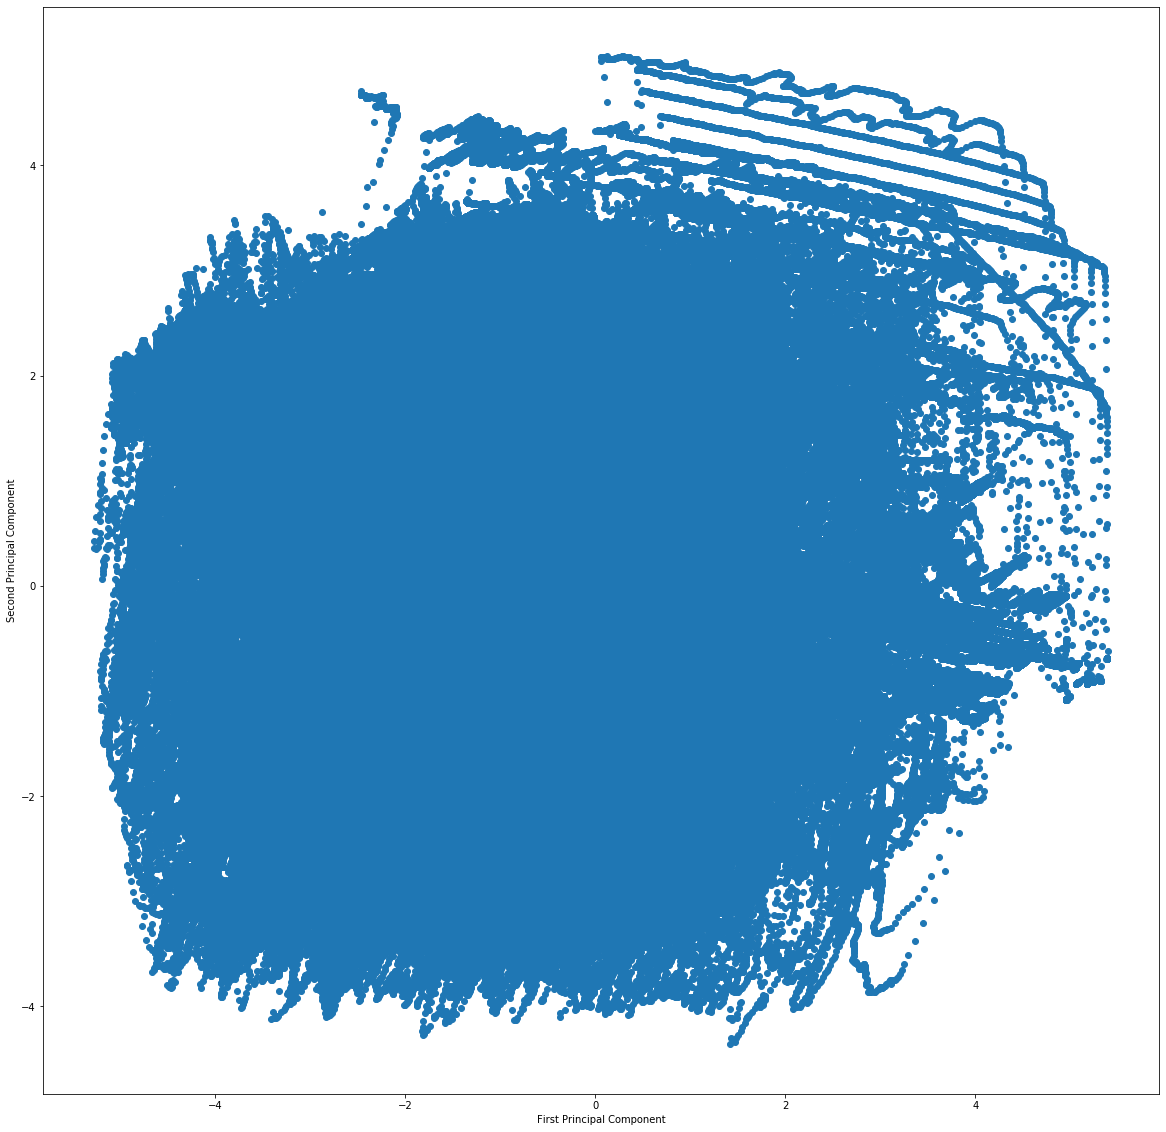

In [58]:
plt.figure(figsize=(20,20))
plt.scatter(x_pca[:,0],x_pca[:,1], cmap = 'plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# KMeans Clustering

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
kmeans.cluster_centers_

array([[ 0.83050997,  1.96255106],
       [-1.2629073 , -1.59012122],
       [ 2.59410227, -0.92756175],
       [-2.28970656,  1.6566276 ]])

In [67]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

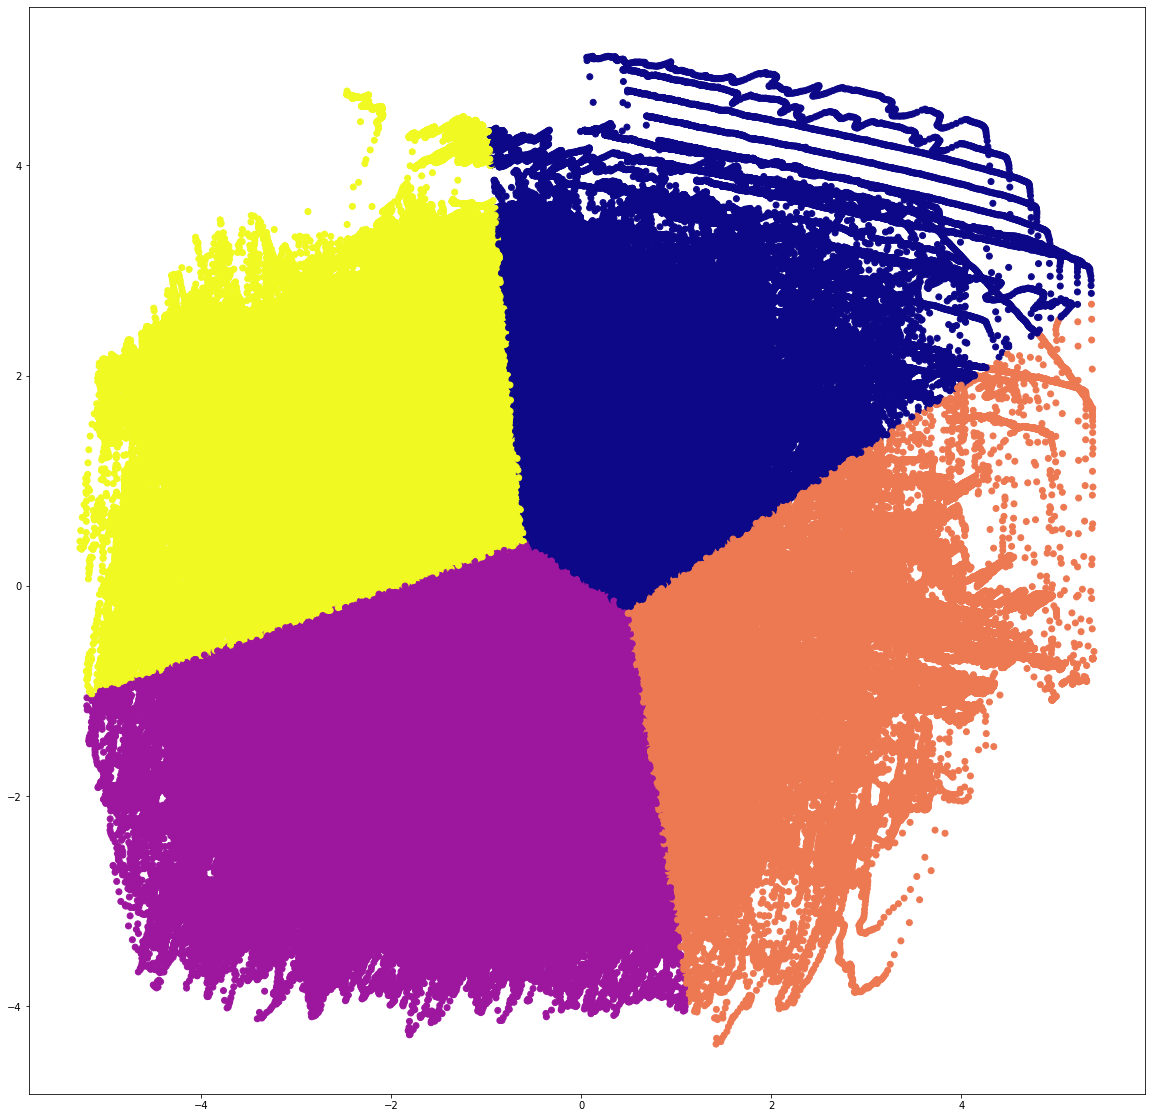

In [68]:
plt.figure(figsize=(20,20))
plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans.labels_, cmap = 'plasma')

In [69]:
df['motor_speed'].value_counts()

-1.222430    4836
-1.222430    4788
-1.222430    4723
-1.222430    4689
-1.222430    4680
             ... 
 0.701893       1
 1.630133       1
 1.008702       1
 1.420283       1
-0.950945       1
Name: motor_speed, Length: 490798, dtype: int64

In [72]:
(df['motor_speed'] == -1.222430).count()

998070